In [1]:
# Importing libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
# uploading the data
log=pd.read_csv('config.csv')

In [3]:
# getting twitter api credentials
twitterApiKey=log['twitterApiKey'][0]
twitterApiSecret=log['twitterApiSecret'][0]
twitterApiAccessToken=log['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret=log['twitterApiAccessTokenSecret'][0]

In [4]:
# creating authentication object to authenticate the tokens
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)

# setting the access token and access token secret 
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)

# creating the api object
twitterApi=tweepy.API(auth)

In [5]:
# extracting 100 tweets from the tweeter user
posts=twitterApi.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")

In [9]:
# printing the 5 recent tweets from the account
print("5 recent tweets are: \n")
i=1
for tweet in posts[0:5]:
    print(str(i)+')- '+tweet.full_text+'\n')
    i=i+1

5 recent tweets are: 

1)- RT @gatesfoundation: As our CEO @MSuzman says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…

2)- https://t.co/padmHSgWGc

3)- RT @WHO: The @ACTAccelerator, an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight #…

4)- I was honored to speak at today’s #LeadersClimateSummit about the three things we need to do to avoid a climate disaster. https://t.co/0YJJyabeIn

5)- Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you @POTUS for your leadership. https://t.co/SVeKp1KPHT



In [7]:
# creating a dataframe with a column called Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

# showing the first 10 rows of data
df.head(10)

,Tweets
0,"RT @gatesfoundation: As our CEO @MSuzman says,..."
1,https://t.co/padmHSgWGc
2,"RT @WHO: The @ACTAccelerator, an unprecedented..."
3,I was honored to speak at today’s #LeadersClim...
4,Ambitious short-term goals like this are criti...
5,It’s encouraging to see @POTUS Biden and @Clim...
6,Yesterday's verdict was a step in the right di...
7,“Time” is a poetic portrait of a family who lo...
8,"If “Time” wins the Oscar this year, it will be..."
9,Communities of color have been hit hard by COV...


In [8]:
# creating a function to remove unwanted texts
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)     # removing @mentions
  text = re.sub(r'#', '', text )                # removing '#' sign
  text = re.sub(r'RT[\s]+', '', text)           # removing RT
  text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
  return text

In [9]:
# applying the cleanText functions on all tweets
df['Tweets']=df['Tweets'].apply(cleanText)

#showing the cleaned tweets
df

,Tweets
0,": As our CEO says, no barriers should stand i..."
1,https://t.co/padmHSgWGc
2,": The , an unprecedented global alliance to de..."
3,I was honored to speak at today’s LeadersClima...
4,Ambitious short-term goals like this are criti...
...,...
95,Standing up for science has never been more im...
96,I've known and learned from for more than 40 ...
97,This book has nothing to do with viruses or pa...
98,Monoclonal antibodies are one of the most prom...


In [10]:
# creating a function to get the subjectivity
def getTextSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# creating a function to get the polarity
def getTextPolarity(text):
    return TextBlob(text).sentiment.polarity

In [11]:
# creating two new columns in dataframe
df['Subjectivity']=df['Tweets'].apply(getTextSubjectivity)
df['Polarity']=df['Tweets'].apply(getTextPolarity)

# showing the modified dataframe
df

,Tweets,Subjectivity,Polarity
0,": As our CEO says, no barriers should stand i...",1.000000,0.500000
1,https://t.co/padmHSgWGc,0.000000,0.000000
2,": The , an unprecedented global alliance to de...",0.450000,0.300000
3,I was honored to speak at today’s LeadersClima...,0.000000,0.000000
4,Ambitious short-term goals like this are criti...,0.668750,0.062500
...,...,...,...
95,Standing up for science has never been more im...,0.750000,0.450000
96,I've known and learned from for more than 40 ...,0.550000,0.425000
97,This book has nothing to do with viruses or pa...,0.966667,0.600000
98,Monoclonal antibodies are one of the most prom...,0.525714,0.222857


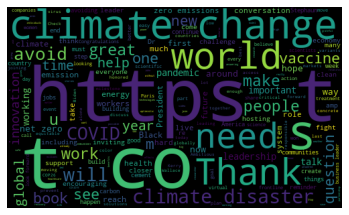

In [12]:
# plotting the word cloud for visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, max_font_size=110).generate(allWords)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [8]:
# creating a function for text analysis
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"
    
# creatin a new column
df['Analysis']=df['Polarity'].apply(getTextAnalysis)

# showing the dataframe
#df
min(df['Subjectivity'])

NameError: name 'df' is not defined

In [14]:
# printing all the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')- '+sortedDF['Tweets'][i])
        print()
        j=j+1

1)- : As our CEO  says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…

2)- : The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …

3)- Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you  for your leadership. https://t.co/SVeKp1KPHT

4)- It’s encouraging to see  Biden and  Kerry re-establish America’s leading role on climate change. I look forward to joining leaders from around the world to talk about some of the most important challenges we need to overcome to avoid a climate disaster. https://t.co/a9CXZzIg6Y

5)- Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the injustice and inequity that Black people experience daily.  I hope we will continue to make real 

In [15]:
# getting the percentage of positive tweets
positive=df[df['Analysis']=="Positive"]
print(str(round((positive.shape[0]/(df.shape[0])*100),1))+"% of positive tweets")

69.0% of positive tweets


In [16]:
# printing all the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')- '+sortedDF['Tweets'][i])
        print()
        j=j+1

1)- Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. https://t.co/VIaM9385bv

2)- Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. https://t.co/7wqSeT3DJN

3)- It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects: https://t.co/XciR3lIVzs https://t.co/Y2do5GhsGx

4)- : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5)- For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of 

In [17]:
# getting the percentage of negative tweets
negative=df[df['Analysis']=="Negative"]
print(str(round((negative.shape[0]/(df.shape[0])*100),1))+"% of negative tweets")

14.0% of negative tweets


In [18]:
# printing all the neutral tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Neutral'):
        print(str(j)+')- '+sortedDF['Tweets'][i])
        print()
        j=j+1

1)- https://t.co/padmHSgWGc

2)- I was honored to speak at today’s LeadersClimateSummit about the three things we need to do to avoid a climate disaster. https://t.co/0YJJyabeIn

3)- Cement is responsible for 6% of carbon emissions globally. To get to net-zero by 2050, we need innovations to decarbonize the material. I discuss a few approaches to make low-emission cement in my climate book: https://t.co/Ok1p3xQir4

4)- Here are five things you should know if you want to understand how variants are (and aren’t) complicating the pandemic. https://t.co/rANiDcZynJ

5)- : 💡 From climateadaptation to genderequality, discover ’s 50 years of innovations that changed the world 🌎 🎉: https://t.co…

6)- : It's WorldTBDay

Even as we battle COVID19, we must not ease up the fight against Tuberculosis, which remains the 🌎🌍🌏’s deadlie…

7)- I’m answering your questions now on : https://t.co/HXMsI0lSK1 https://t.co/XG7eAMNrGM

8)- After you finish your pancakes this morning, come ask me anything on  at

In [19]:
# getting the percentage of neutral tweets
neutral=df[df['Analysis']=="Neutral"]
print(str(round((neutral.shape[0]/(df.shape[0])*100),1))+"% of neutral tweets")

17.0% of neutral tweets


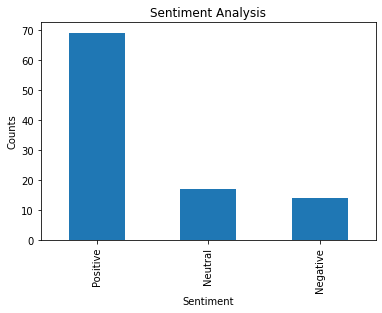

In [20]:
# plotting the bar graph
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()